<a href="https://colab.research.google.com/github/Aayush077/ML/blob/main/earthquake_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthquake Prediction


##Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from google.colab import data_table
import matplotlib.pyplot as plt
!pip install cartopy
import cartopy.crs as ccrs
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.4 MB/s eta 0:00:00


##Importing dataset

In [4]:
data_table.enable_dataframe_formatter()

df_raw = pd.read_csv('earthquake_1995-2023.csv')

display(df_raw.head())
display(df_raw.shape)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


(1000, 19)

In [5]:
print(df_raw.columns)


Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')


###Visualization of data

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


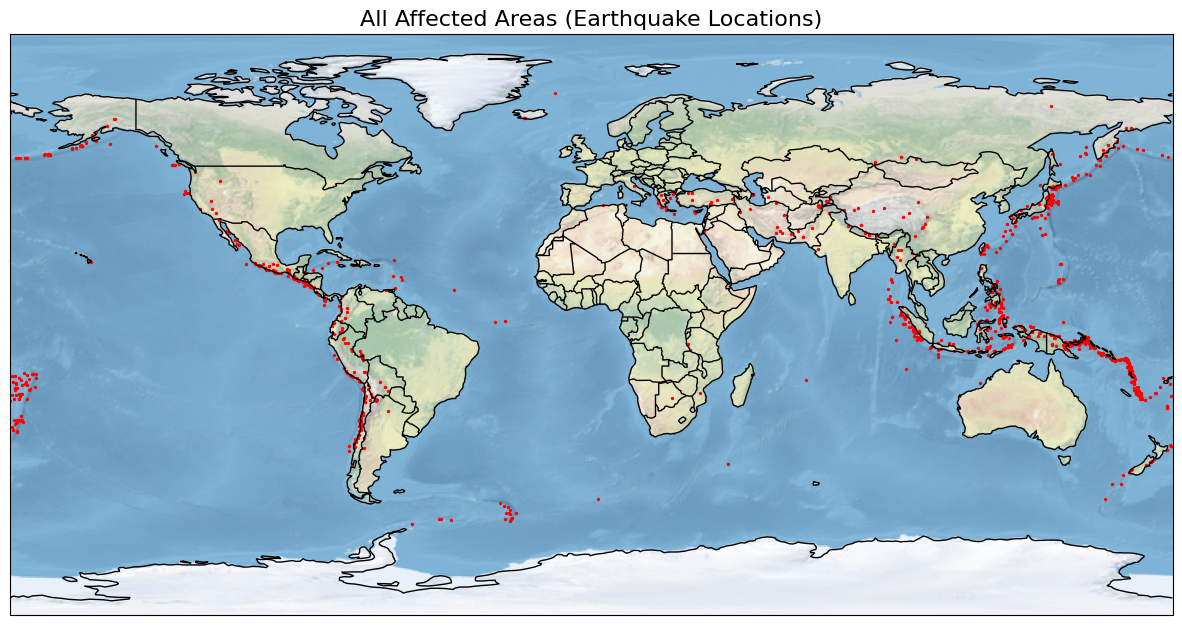

In [6]:
plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.coastlines()
ax.stock_img()
ax.add_feature(__import__("cartopy").feature.BORDERS)

plt.scatter(df_raw['longitude'], df_raw['latitude'],s=2, color='red',
    transform=ccrs.PlateCarree()
)

plt.title("All Affected Areas (Earthquake Locations)", fontsize=16)
plt.show()


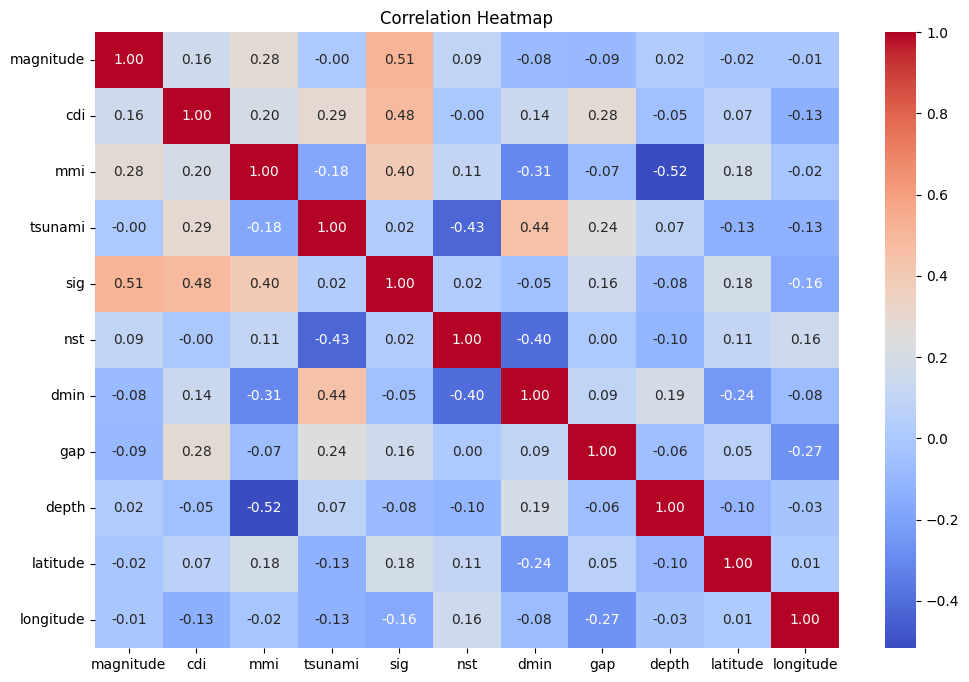

In [7]:
#Correlation HEATMAP
# Pick only the numeric columns and find how they relate
corr = df_raw.select_dtypes(include='number').corr()

# Draw the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##Preprocessing & Spliting


###Shows information about your dataset, Creates a safe copy to work on

In [13]:
print('Columns:', list(df_raw.columns))
print('\nDtypes:\n', df_raw.dtypes)
print('\nMissing values per column:\n', df_raw.isna().sum())

df = df_raw.copy()


Columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Dtypes:
 title         object
magnitude    float64
date_time     object
cdi            int64
mmi            int64
alert         object
tsunami        int64
sig            int64
net           object
nst            int64
dmin         float64
gap          float64
magType       object
depth        float64
latitude     float64
longitude    float64
location      object
continent     object
country       object
dtype: object

Missing values per column:
 title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64


In [14]:
# clean and standardize column names – only rename what exists in your dataset
col_map = {
    'mag': 'magnitude',
    'magnitude': 'magnitude',
    'date_time': 'date_time',
    'time': 'time',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'depth': 'depth',
    'magType': 'magType',
    'nst': 'num_stations',
    'dmin': 'dmin',
    'gap': 'gap',
    'rms': 'rms',
    'mmi': 'mmi',
    'cdi': 'cdi',
    'alert': 'alert',
    'tsunami': 'tsunami',
    'country': 'country',
    'continent': 'continent',
    'location': 'location',
    'title': 'title',
    'sig': 'sig'
}

# Apply renaming only to matching columns
df = df.rename(columns={col: col_map[col] for col in df.columns if col in col_map})

print("Renamed columns:")
print(df.columns.tolist())


Renamed columns:
['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'num_stations', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']


In [15]:
# Parse datetime column
if df.index.name == 'date_time':
    df = df.reset_index()

df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

print("Invalid datetime rows:", df['date_time'].isna().sum())

# Create simple time features
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour

# Set datetime as index
df = df.set_index('date_time')


Invalid datetime rows: 0


/tmp/ipython-input-1205823069.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


In [16]:
# Select useful features
feature_list = [
    'latitude','longitude','depth','num_stations','dmin','gap','rms',
    'mmi','cdi','tsunami','sig','year','month','hour',
    'magType','alert','continent','country','location','title'
]

# Keep only columns that exist
keep_cols = [c for c in feature_list if c in df.columns]
print("Keeping columns:", keep_cols)

# Build final modeling dataframe
df_model = df[keep_cols + ['magnitude']].copy()

# Drop rows with missing target
df_model = df_model.dropna(subset=['magnitude'])

# Fill missing values
num_cols = df_model.select_dtypes(include=['number']).columns.drop('magnitude')
df_model[num_cols] = df_model[num_cols].fillna(df_model[num_cols].median())

cat_cols = df_model.select_dtypes(include=['object']).columns
df_model[cat_cols] = df_model[cat_cols].fillna('missing')

print("Missing values after cleaning:\n", df_model.isna().sum())


Keeping columns: ['latitude', 'longitude', 'depth', 'num_stations', 'dmin', 'gap', 'mmi', 'cdi', 'tsunami', 'sig', 'year', 'month', 'hour', 'magType', 'alert', 'continent', 'country', 'location', 'title']
Missing values after cleaning:
 latitude        0
longitude       0
depth           0
num_stations    0
dmin            0
gap             0
mmi             0
cdi             0
tsunami         0
sig             0
year            0
month           0
hour            0
magType         0
alert           0
continent       0
country         0
location        0
title           0
magnitude       0
dtype: int64


### CORE PREPROCESSING AND SPLITING OF DATASET

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Train-test split
X = df_model.drop(columns=['magnitude'])
y = df_model['magnitude']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train/Test shapes:", X_train.shape, X_test.shape)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

# Transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


Train/Test shapes: (800, 19) (200, 19)
Numeric: ['latitude', 'longitude', 'depth', 'num_stations', 'dmin', 'gap', 'mmi', 'cdi', 'tsunami', 'sig', 'year', 'month', 'hour']
Categorical: ['magType', 'alert', 'continent', 'country', 'location', 'title']


##LINEAR REG

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Pipeline
lr_model = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', LinearRegression())
])

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 0.11286044839349359
Linear Regression R²: 0.42235339950279616


###Visualization(Actual Vs Predicted Linear Reg)

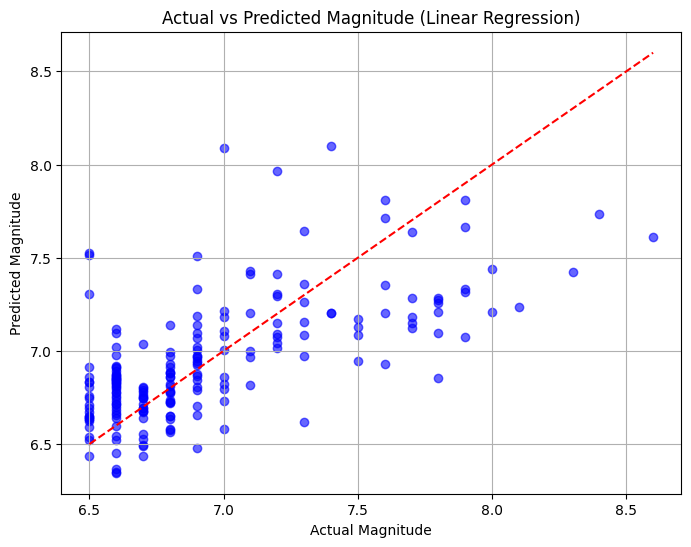

In [22]:
y_pred_model = y_pred_lr

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_model, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (Linear Regression)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


## SV REG

In [23]:
from sklearn.svm import SVR

# SVR Pipeline
svr_model = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', SVR(kernel='rbf'))
])

# Train
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR R²:", r2_svr)


SVR MSE: 0.07289884440777361
SVR R²: 0.626886387111389


###Visualization(Actual Vs Predicted SV Reg)

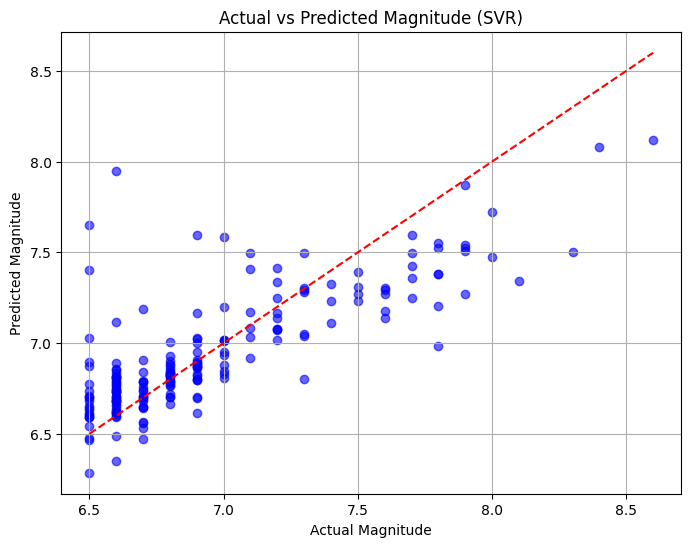

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (SVR)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


##DECISION TREE REG

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Pipeline
dt_model = Pipeline(steps=[
    ('pre', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R²:", r2_dt)


Decision Tree MSE: 0.07845
Decision Tree R²: 0.5984742533450882


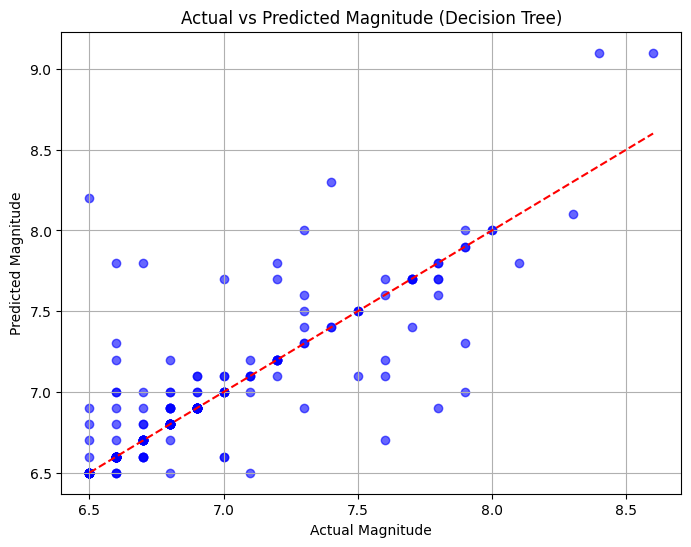

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (Decision Tree)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


##Multi-Layer Perceptron

In [27]:
from sklearn.neural_network import MLPRegressor

# Neural Network Pipeline (MLP)
mlp_model = Pipeline(steps=[
    ('pre', preprocessor),   # scaling + encoding
    ('model', MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        max_iter=1500,
        random_state=42
    ))
])

# Train
mlp_model.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Neural Network (MLP) MSE:", mse_mlp)
print("Neural Network (MLP) R²:", r2_mlp)


Neural Network (MLP) MSE: 0.470244818613773
Neural Network (MLP) R²: -1.4068247534034253


###Visualization(Actual Vs Predicted MLP)

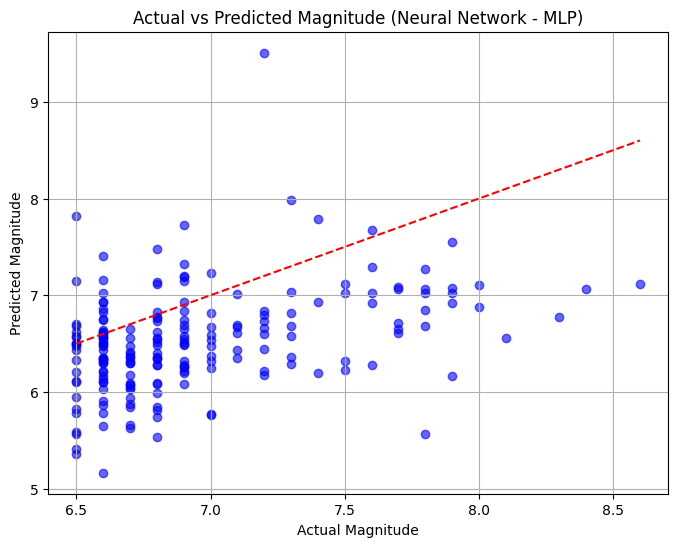

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_mlp, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (Neural Network - MLP)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


## RANDOMFOREST REG

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Simple pipeline (no grid search)
rf_model = Pipeline([
    ("pre", preprocessor),("model", RandomForestRegressor(
        n_estimators=200, max_depth=20,random_state=42,n_jobs=-1))
])

# Fit model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Scores
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RandomForest MSE: {mse_rf:.4f}")
print(f"RandomForest R²: {r2_rf:.4f}")


RandomForest MSE: 0.0410
RandomForest R²: 0.7902


### Visualization(Actual vs Predicted RandomForestReg)

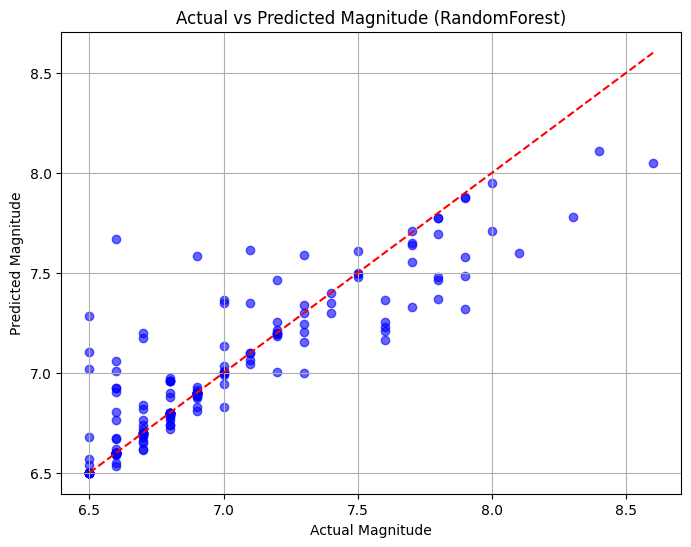

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (RandomForest)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


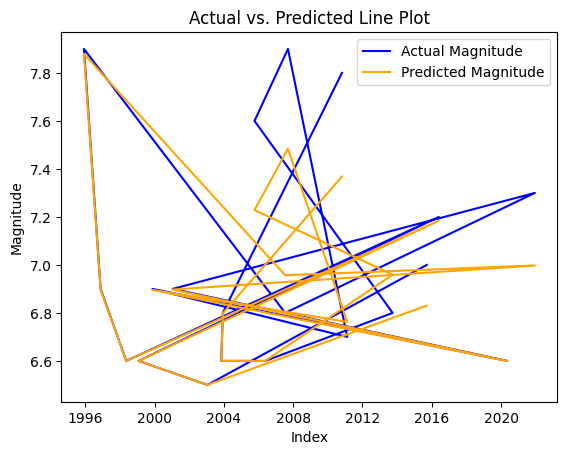

In [39]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred_rf[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

###Top Feature Importances (RandomForest)

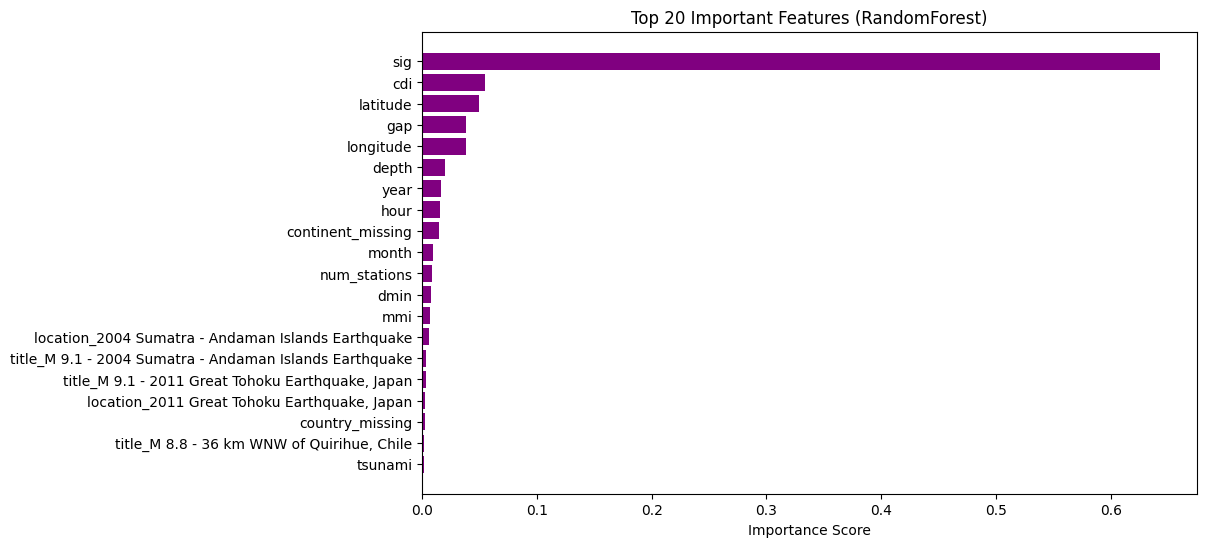

In [40]:
# Extract the trained RandomForest model
rf = rf_model.named_steps["model"]

# Get encoded categorical feature names
ohe = rf_model.named_steps["pre"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features).tolist()

# Combine with numeric feature names
all_feature_names = numeric_features + cat_feature_names

# Create importance dataframe
importances = pd.DataFrame({
    "feature": all_feature_names,
    "importance": rf.feature_importances_
})

# Sort and plot top 20
top_features = importances.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(top_features["feature"], top_features["importance"], color="purple")
plt.gca().invert_yaxis()
plt.title("Top 20 Important Features (RandomForest)")
plt.xlabel("Importance Score")
plt.show()


## XG BOOST REG

In [31]:
from xgboost import XGBRegressor

xgb_model = Pipeline([
        ("pre", preprocessor),
        ("model", XGBRegressor( objective='reg:squarederror',n_estimators=200,
            max_depth=6,learning_rate=0.1, random_state=42, n_jobs=-1))
    ])

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Scores
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

XGBoost MSE: 0.0426
XGBoost R²: 0.7822


### Visualization(Actual Vs Predicted XGBoostReg)

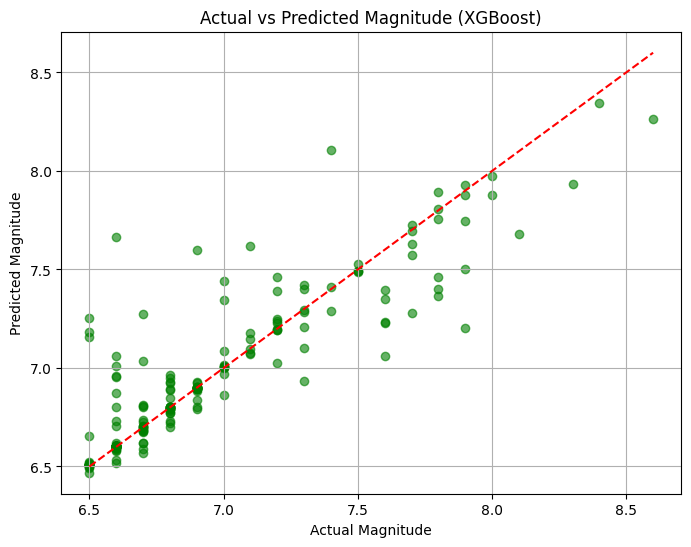

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Magnitude (XGBoost)")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.grid(True)
plt.show()


###Top Feature Importances (SVR)

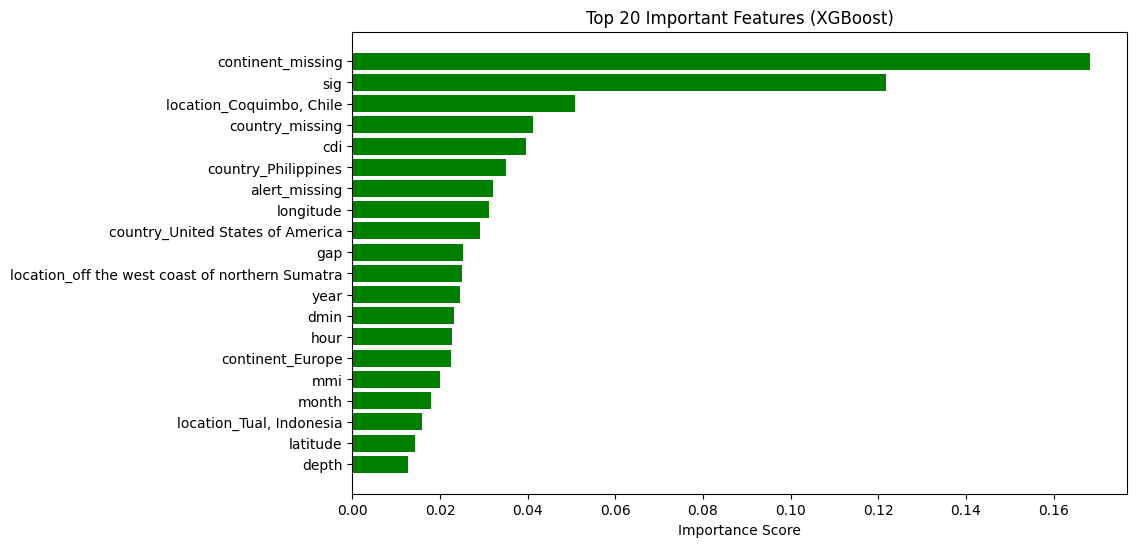

In [34]:
    # Extract the trained XGBoost model
    xgb = xgb_model.named_steps["model"]

    # Get feature names (numeric + encoded categorical)
    ohe = xgb_model.named_steps["pre"].named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(categorical_features).tolist()

    all_feature_names = numeric_features + cat_feature_names

    # Get importance scores
    importances = pd.DataFrame({
        "feature": all_feature_names,
        "importance": xgb.feature_importances_
    })

    # Sort top 20
    top_features = importances.sort_values("importance", ascending=False).head(20)

    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(top_features["feature"], top_features["importance"], color="green")
    plt.gca().invert_yaxis()
    plt.title("Top 20 Important Features (XGBoost)")
    plt.xlabel("Importance Score")
    plt.show()


##RESULTS

In [49]:
# Evaluation Summary

results = []
results.append({"Model": "Linear Regression", "R2": r2_lr, "MSE": mse_lr})
results.append({"Model": "SVR", "R2": r2_svr, "MSE": mse_svr})
results.append({"Model": "Decision Tree", "R2": r2_dt, "MSE": mse_dt})
results.append({"Model": "Neural Network (MLP)", "R2": r2_mlp, "MSE": mse_mlp})
results.append({"Model": "Random Forest", "R2": r2_rf, "MSE": mse_rf})
results.append({"Model": "XGBoost", "R2": r2_xgb, "MSE": mse_xgb})

res_df = pd.DataFrame(results)
display(res_df)



,Model,R2,MSE
0,Linear Regression,0.422353,0.112860
1,SVR,0.626886,0.072899
2,Decision Tree,0.598474,0.078450
3,Neural Network (MLP),-1.406825,0.470245
4,Random Forest,0.790164,0.040998
5,XGBoost,0.782189,0.042556


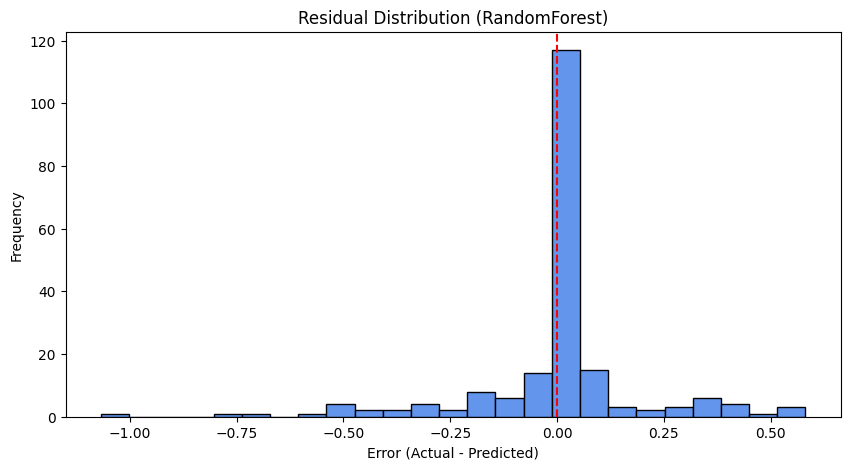

In [47]:
# Residuals (errors)
rf_residuals = y_test - y_pred_rf

plt.figure(figsize=(10,5))
plt.hist(rf_residuals, bins=25, color='cornflowerblue', edgecolor='black')
plt.title("Residual Distribution (RandomForest)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()


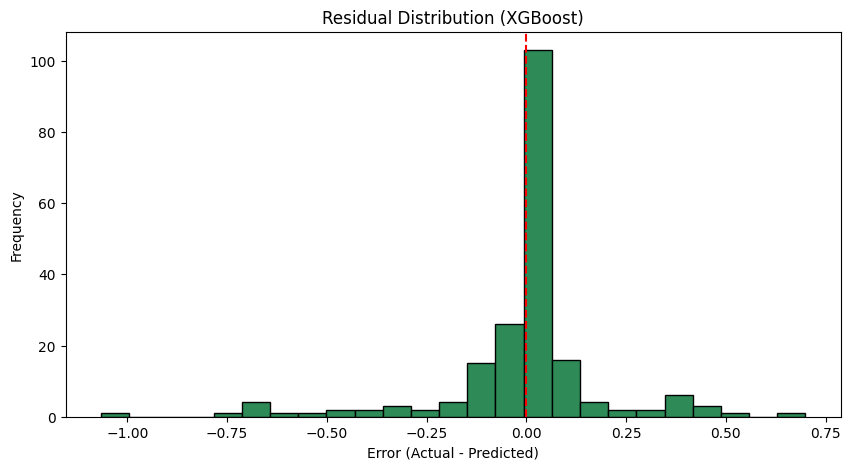

In [48]:

xgb_residuals = y_test - y_pred_xgb
plt.figure(figsize=(10,5))
plt.hist(xgb_residuals, bins=25, color='seagreen', edgecolor='black')
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()



In [ ]:
df_model.to_csv("earthquake_cleaned.csv", index=True)
print("Cleaned dataset saved as earthquake_cleaned.csv")


Cleaned dataset saved as earthquake_cleaned.csv
